In [1]:
#Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [2]:
#get data from saved pickle
df = pd.read_pickle('./cleaned-data.pkl')

In [3]:
df.head(5)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_day
video_id,,,,,,,,,,,,,,,,
kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12 12:20:39+00:00,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,Sunday
zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13 05:43:56+00:00,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",Monday
10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12 15:48:08+00:00,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,Sunday
N1vE8iiEg64,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12 07:08:48+00:00,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,Sunday
kJzGH0PVQHQ,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13 01:14:16+00:00,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,Monday


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32562 entries, kzwfHumJyYc to K10YIAokjvE
Data columns (total 16 columns):
trending_date             32562 non-null datetime64[ns]
title                     32562 non-null object
channel_title             32562 non-null object
category_id               32562 non-null category
publish_time              32562 non-null datetime64[ns, UTC]
tags                      32562 non-null object
views                     32562 non-null int64
likes                     32562 non-null int64
dislikes                  32562 non-null int64
comment_count             32562 non-null int64
thumbnail_link            32562 non-null object
comments_disabled         32562 non-null bool
ratings_disabled          32562 non-null bool
video_error_or_removed    32562 non-null bool
description               32562 non-null object
publish_day               32562 non-null object
dtypes: bool(3), category(1), datetime64[ns, UTC](1), datetime64[ns](1), int64(4), object(6)
memory

In [5]:
#Since data is heavily skewed, I tried to ignore the outliers for plotting
df1 = df[df['likes'] < 100000]
df1 = df1[df1['views'] < 10000000]
# we are not losing a lot of data-points by ignoring the outliers
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30710 entries, kzwfHumJyYc to K10YIAokjvE
Data columns (total 16 columns):
trending_date             30710 non-null datetime64[ns]
title                     30710 non-null object
channel_title             30710 non-null object
category_id               30710 non-null category
publish_time              30710 non-null datetime64[ns, UTC]
tags                      30710 non-null object
views                     30710 non-null int64
likes                     30710 non-null int64
dislikes                  30710 non-null int64
comment_count             30710 non-null int64
thumbnail_link            30710 non-null object
comments_disabled         30710 non-null bool
ratings_disabled          30710 non-null bool
video_error_or_removed    30710 non-null bool
description               30710 non-null object
publish_day               30710 non-null object
dtypes: bool(3), category(1), datetime64[ns, UTC](1), datetime64[ns](1), int64(4), object(6)
memory

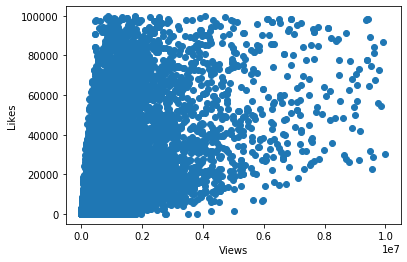

In [6]:
#Scatter plot between likes and views does not show any pattern
plt.scatter(x=df1['views'],y=df1['likes'])
plt.xlabel('Views')
plt.ylabel('Likes')
plt.show()

In [7]:
df['views'].corr(df['likes'])

0.8526999879646519

In [8]:
#correlation coefficient is not close to 1 as we expect it to be
df1['views'].corr(df1['likes'])

0.6030557626697557

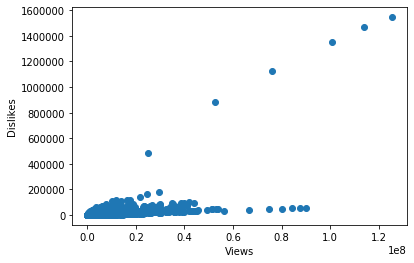

In [9]:
#Skewed data makes the plot very less interpretable
plt.scatter(x=df['views'],y=df['dislikes'])
plt.xlabel('Views')
plt.ylabel('Dislikes')
plt.show()

In [10]:
df['views'].corr(df['dislikes'])

0.5516968114844908

In [11]:
df2 = df[df['dislikes'] < 40000]
df2 = df2[df2['views'] < 10000000]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32031 entries, kzwfHumJyYc to K10YIAokjvE
Data columns (total 16 columns):
trending_date             32031 non-null datetime64[ns]
title                     32031 non-null object
channel_title             32031 non-null object
category_id               32031 non-null category
publish_time              32031 non-null datetime64[ns, UTC]
tags                      32031 non-null object
views                     32031 non-null int64
likes                     32031 non-null int64
dislikes                  32031 non-null int64
comment_count             32031 non-null int64
thumbnail_link            32031 non-null object
comments_disabled         32031 non-null bool
ratings_disabled          32031 non-null bool
video_error_or_removed    32031 non-null bool
description               32031 non-null object
publish_day               32031 non-null object
dtypes: bool(3), category(1), datetime64[ns, UTC](1), datetime64[ns](1), int64(4), object(6)
memory

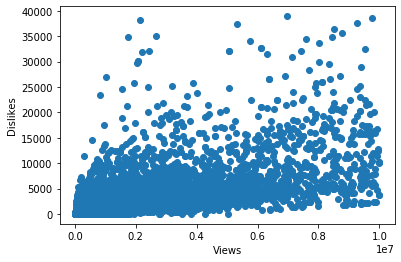

In [12]:
#Scatter plot ignoring outliers does not help to draw any conclusion of relation between dislikes and views
plt.scatter(x=df2['views'],y=df2['dislikes'])
plt.xlabel('Views')
plt.ylabel('Dislikes')
plt.show()

In [13]:
df2['views'].corr(df2['dislikes'])

0.7144088147096157

In [14]:
#Add new column which is month of year which might help do some analysis
df['year-month'] = pd.to_datetime(pd.DatetimeIndex(df['publish_time']).year.astype(str) + '-' + pd.DatetimeIndex(df['publish_time']).month.astype(str))

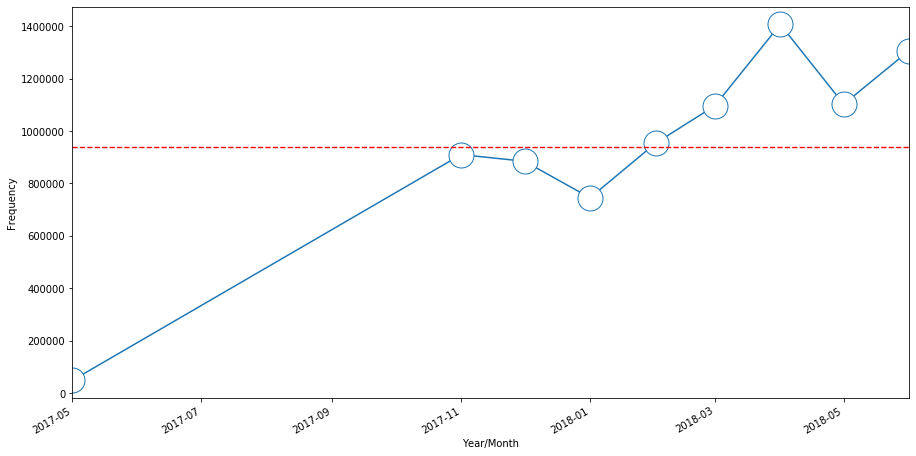

In [15]:
#Plot below shows that videos published during end of year and beginning of the year had less views. Maybe this
#suggests people tend to be less online during holidays?
ax = df.groupby('year-month')['views'].mean().plot(figsize=(15,8), marker='o', ms=25, mfc='white' )
plt.axhline(df.groupby('year-month')['views'].mean().mean(), color='red', ls='--', lw=1.4)
plt.ylabel('Frequency')
plt.xlabel('Year/Month')
plt.show()

In [16]:
def day_to_num(row):
    if row == 'Sunday':
        return 1
    if row == 'Monday':
        return 2
    if row == 'Tuesday':
        return 3
    if row == 'Wednesday':
        return 4
    if row == 'Thursday':
        return 5
    if row == 'Friday':
        return 6
    if row == 'Saturday':
        return 7

df['publish_daynum'] = df['publish_day'].apply(day_to_num)

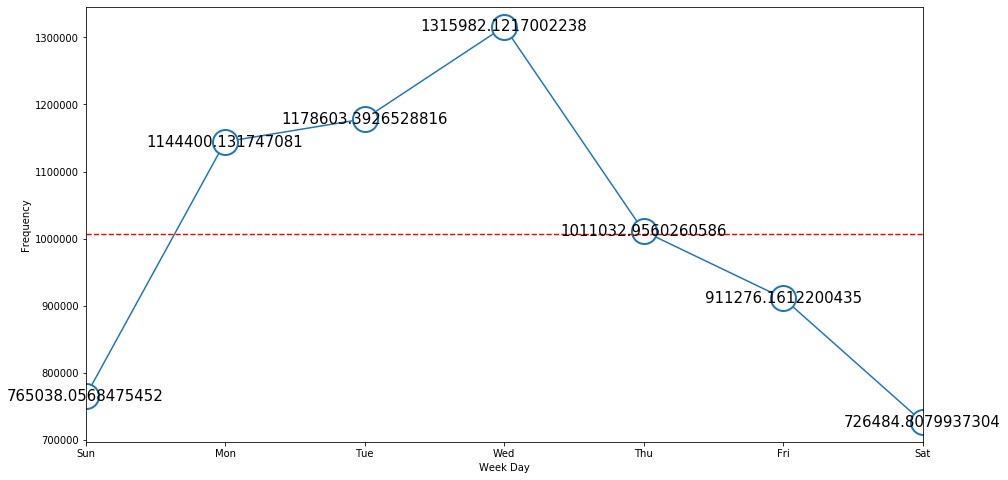

In [17]:
#Below plot shows that videos published during the week tend to be viewed more compared to the ones
#published during weekend
ax = df.groupby('publish_daynum')['views'].mean().plot(figsize=(15,8), marker='o', ms=25, mew=2, mfc='white' )
plt.axhline(df.groupby('publish_daynum')['views'].mean().mean(), color='red', ls='--', lw=1.4)
for i,j in df.groupby('publish_daynum')['views'].mean().iteritems():
    ax.annotate(j, (i,j), fontsize=15, va='center', ha='center')
plt.ylabel('Frequency')
plt.xlabel('Week Day')
plt.xticks(np.arange(1,8), ('Sun','Mon','Tue','Wed','Thu','Fri','Sat'))
plt.show()

In [18]:
#When comments are disabled, people tend to neither like or dislike the videos
df.groupby('comments_disabled')['views','likes','dislikes','comment_count'].mean()

,views,likes,dislikes,comment_count
comments_disabled,,,,
False,1.027022e+06,26759.984815,1631.947042,2649.88843
True,4.283319e+05,2562.452952,575.595941,0.00000


In [19]:
#Similarly, when ratings are disabled people tend to not much comment on those videos
df.groupby('ratings_disabled')['views','likes','dislikes','comment_count'].mean()

,views,likes,dislikes,comment_count
ratings_disabled,,,,
False,1.022784e+06,26515.499043,1631.298434,2612.797383
True,2.811639e+05,0.000000,0.000000,196.657475


In [20]:
ranges = [0,20000, 50000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 10000000,20000000,30000000,40000000,50000000,60000000,70000000]
df.groupby(pd.cut(df['views'], ranges))['views'].count()

views
(0, 20000]               441
(20000, 50000]          2373
(50000, 100000]         4236
(100000, 200000]        6199
(200000, 300000]        3775
(300000, 400000]        2648
(400000, 500000]        1856
(500000, 600000]        1382
(600000, 700000]        1131
(700000, 800000]         943
(800000, 900000]         750
(900000, 1000000]        638
(1000000, 10000000]     5681
(10000000, 20000000]     360
(20000000, 30000000]      82
(30000000, 40000000]      40
(40000000, 50000000]      11
(50000000, 60000000]       6
(60000000, 70000000]       1
Name: views, dtype: int64

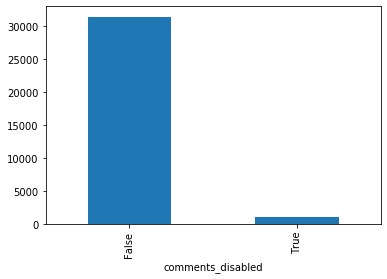

In [21]:
df.groupby('comments_disabled')['comments_disabled'].count().plot(kind='bar')
plt.show()

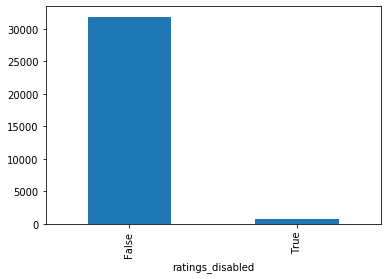

In [22]:
df.groupby('ratings_disabled')['ratings_disabled'].count().plot(kind='bar')
plt.show()

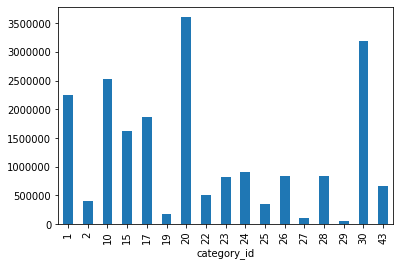

In [23]:
#videos posted under categories 10,20 and 30 have significantly more views compared to others
df.groupby('category_id')['views'].mean().plot(kind='bar')
plt.show()

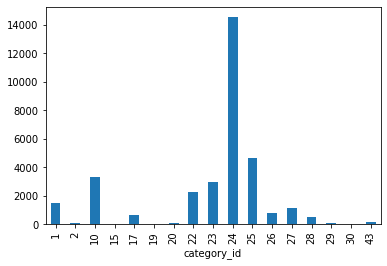

In [24]:
#the dataset has many videos posted under category 24
df.groupby('category_id')['category_id'].count().plot(kind='bar')
plt.show()

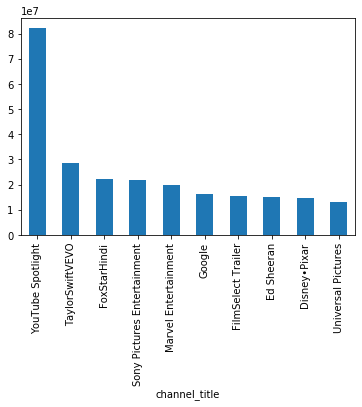

In [25]:
#Below are the top 10 channels who have the msot views
df.groupby('channel_title')['views'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

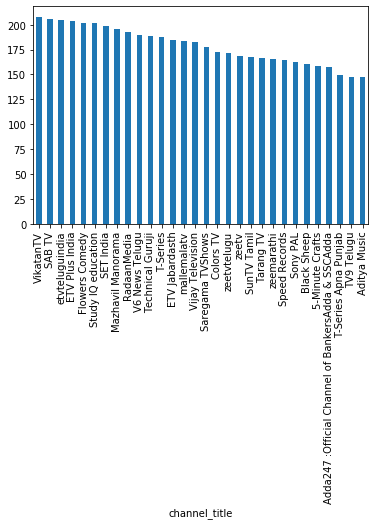

In [26]:
df.groupby('channel_title')['channel_title'].count().sort_values(ascending=False).head(30).plot(kind='bar')
plt.show()

# Below is some text analysis to see if there are some words in description or title which draws more views

In [27]:
word_freq = defaultdict(int)

for text in df['description']:
    for word in text.split():
        word_freq[word] += 1

pd.DataFrame.from_dict(word_freq, orient='index').sort_values(0,ascending=False).rename(columns={0: 'Frequency'})

,Frequency
the,68906
-,67645
and,57269
:,54658
to,48264
on,47571
of,42768
in,31228
us,30617
a,30073


In [28]:
ignore_list = pd.DataFrame.from_dict(word_freq, orient='index').sort_values(0,ascending=False).head(38).index.tolist()

In [29]:
ignore_list

['the',
 '-',
 'and',
 ':',
 'to',
 'on',
 'of',
 'in',
 'us',
 'a',
 'is',
 'for',
 '&',
 'by',
 'with',
 '|',
 'Subscribers',
 'To',
 'your',
 'The',
 'you',
 'as',
 'at',
 'our',
 'from',
 'this',
 'more',
 'video',
 'latest',
 ',',
 'Subscribe',
 'all',
 'his',
 'her',
 'has',
 'News',
 'news',
 'Dial']

In [30]:
word_freq1 = defaultdict(int)
word_freq1.clear()
for text in df['description']:
    for word in text.split():
        if word not in ignore_list:
            word_freq1[word] += 1

pd.DataFrame.from_dict(word_freq1, orient='index').sort_values(0,ascending=False).rename(columns={0: 'Frequency'})

,Frequency
Music,6182
TV,5994
Watch,5919
:-,5889
Telugu,5784
that,5763
sms,5755
Facebook,5667
are,5656
Follow,5548


In [31]:
word_freq2 = defaultdict(int)
word_freq2.clear()
for text in df['title']:
    for word in text.split():
        word_freq2[word] += 1
        
pd.set_option('display.max_rows', 100)
pd.DataFrame.from_dict(word_freq2, orient='index').sort_values(0,ascending=False).rename(columns={0: 'Frequency'}).head(100)

,Frequency
|,36444
-,13771
2018,5763
Episode,3596
||,3353
The,1700
2017,1594
Movie,1593
Full,1579
Song,1569


In [32]:
word_freq3 = defaultdict(int)
word_freq3.clear()
for text, view in zip(df['title'],df['views']):
    for word in text.split():
        word_freq3[word] = word_freq3[word] + view/ word_freq2[word]
pd.DataFrame.from_dict(word_freq3, orient='index').sort_values(0,ascending=False).rename(columns={0: 'Views Avg'}).head(100)

,Views Avg
Shape,8.226435e+07
Rewind:,8.226435e+07
#YouTubeRewind,6.176645e+07
VENOM,3.206646e+07
Delicate,3.128898e+07
"Sheeran,",3.039819e+07
Hirani,2.481408e+07
CHORI,2.480890e+07
Ishers,2.480890e+07
Simar,2.480890e+07


In [33]:
word_freq3 = defaultdict(int)
word_freq3.clear()
for text, view in zip(df['description'],df['views']):
    for word in text.split():
        word_freq3[word] = word_freq3[word] + view/ word_freq[word]
pd.DataFrame.from_dict(word_freq3, orient='index').sort_values(0,ascending=False).rename(columns={0: 'Views Avg'}).head(100)

,Views Avg
https://www.youtube.com/thehoodinternet\n\nYouTube,8.226435e+07
game:,8.226435e+07
https://rewind2017.withyoutube.com/creators\nSpend,8.226435e+07
Rewind:,8.226435e+07
http://yt.be/dejaview\n\nWatch,8.226435e+07
#YouTubeRewind\n\nMeet,8.226435e+07
http://youtube.com/rewind\nSee,8.226435e+07
http://youtube.com/trending\n\nWatch,8.226435e+07
https://youtu.be/OIQQ8jmsbMM,8.226435e+07
happen:,8.226435e+07
